In [2]:
%aiida

Loaded AiiDA DB environment - profile name: scanlon-test.

In [3]:
%matplotlib inline

In [4]:
import aiida.orm as orm
from pymatgen.phonon.bandstructure import PhononBandStructureSymmLine


In [5]:
def make_latex_labels(labels: list) -> list:
    """Convert labels to laxtex style"""
    label_mapping = {
        'GAMMA': r'\Gamma',
        'LAMBDA': r'\Lambda',
        'SIGMA': r'\Sigma',
    }
    out_labels = []
    for label in labels:
        for tag, replace in label_mapping.items():
            if tag in label:
                label = label.replace(tag, replace)
                break
        out_labels.append(f'{label}')
    return out_labels

def get_pymatgen_phonon_bands(band_structure: orm.BandsData, input_structure: orm.StructureData,
                              has_nac=False) -> PhononBandStructureSymmLine:
    """
    Obtain a pymatgen phonon bandstructure plotter
    """
    qpoints = band_structure.get_kpoints()
    freq = np.transpose(band_structure.get_bands())  # Pymatgen uses (3 * natoms, number qpoints) for frequency
    structure = input_structure.get_pymatgen()
    lattice = structure.lattice.reciprocal_lattice
    idx, labels = zip(*band_structure.labels)
    labels = make_latex_labels(labels)
    labels_dict = {label: qpoints[idx]for idx, label in zip(idx, labels)}
    pbs = PhononBandStructureSymmLine(qpoints, freq, lattice, labels_dict=labels_dict, structure=structure, has_nac=has_nac)
    return pbs


def get_sumo_phonon_plotter(band_structure: orm.BandsData, input_structure: orm.StructureData, has_nac=False, imag_tol=-5e-2):
    """
    Obtain a sumo phonon plotter object
    """
    from sumo.plotting.phonon_bs_plotter import SPhononBSPlotter
    bs = get_pymatgen_phonon_bands(band_structure, input_structure, has_nac)
    return SPhononBSPlotter(bs, imag_tol)

## Experimental plot interface using sumo

In [6]:
from importlib import reload
from toolchest import phonopy_aiida
reload(phonopy_aiida)

<module 'toolchest.phonopy_aiida' from '/home/bonan/appdir/python-tools/toolchest/phonopy_aiida.py'>

## For Li4Fe3S3O2 - enumerate minimum

In [7]:
from pymatgen.analysis.structure_analyzer import SpacegroupAnalyzer

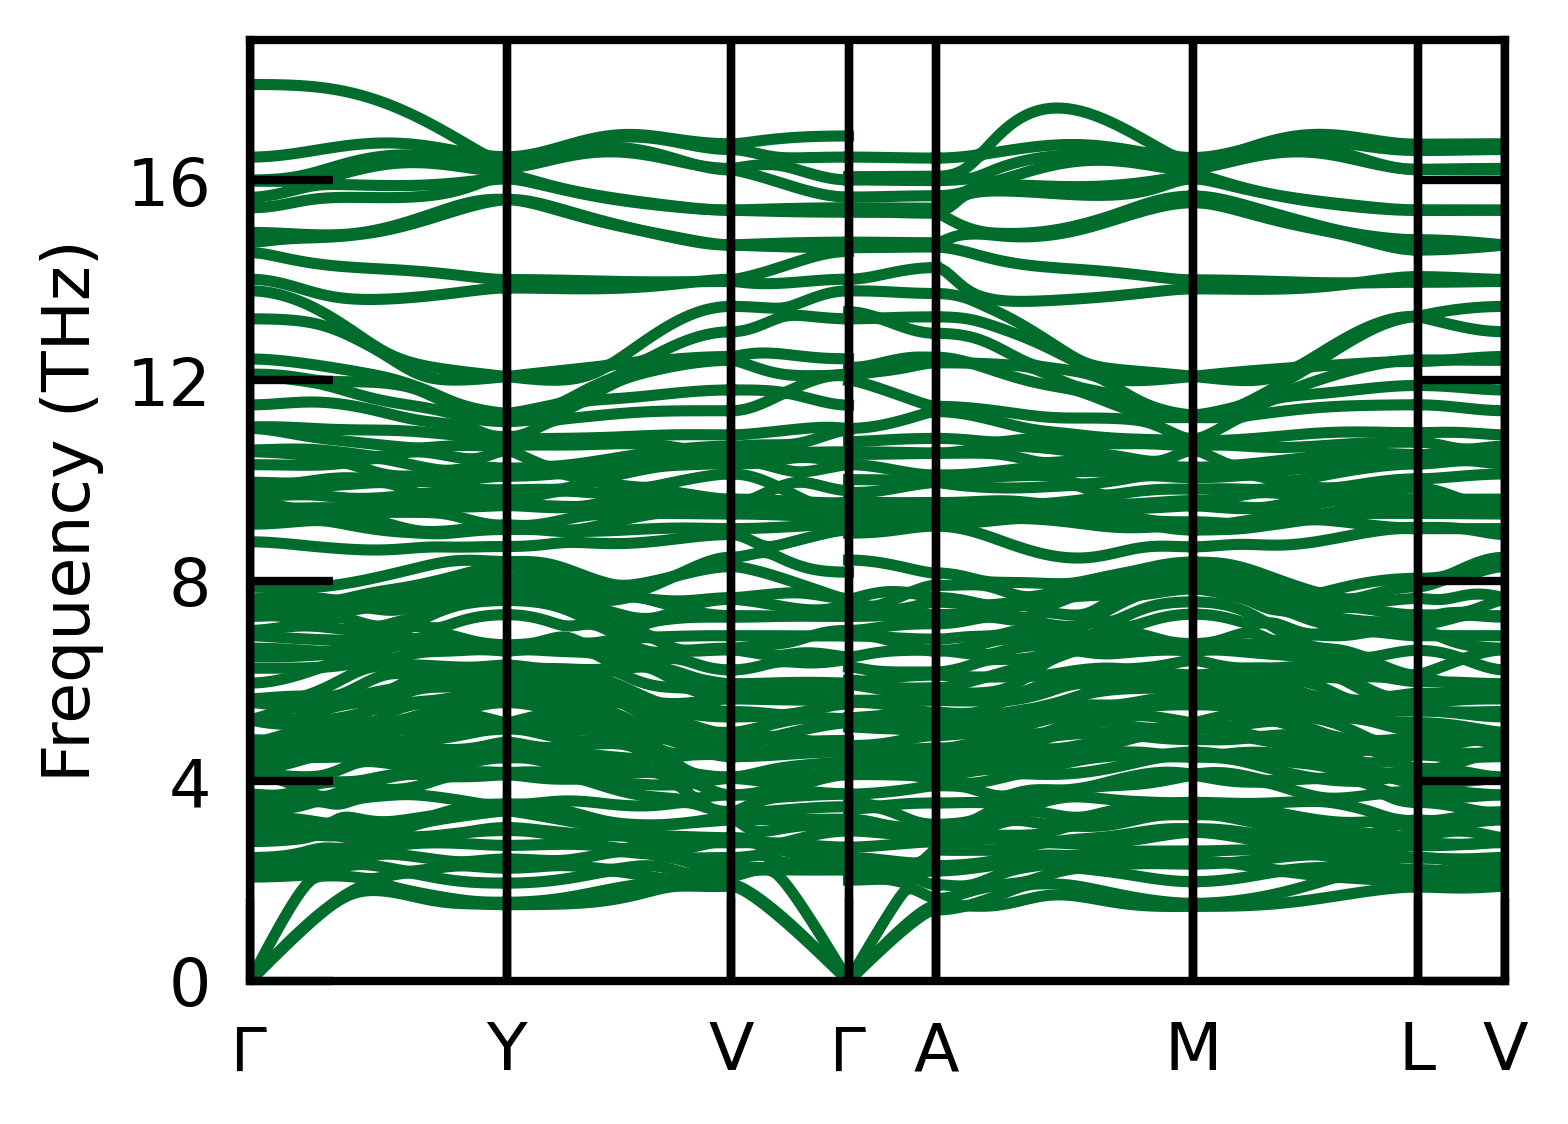

In [16]:
li4fe3s3o2 = load_node('9db2ed24-4a97-4a23-af71-b651a54e2699')
itf = phonopy_aiida.SumoPlotInterface.from_work_node(li4fe3s3o2)
itf.get_phonon_band_structure()
pl = itf.plot_phonon_bs(width=4, height=3,style={'font.size': 12}, dpi=120)
pl.savefig('li4fe3s3o2.svg')
ps = li4fe3s3o2.inputs.structure.get_pymatgen()
spa = SpacegroupAnalyzer(ps)
conv = spa.get_conventional_standard_structure()
conv.to('poscar', 'li4fe3s3o2-inp.vasp')

## For Li2Fe2S2O - mode pushed

/home/bonan/miniconda3/envs/aiida-1.0-py3/lib/python3.8/site-packages/seekpath/hpkot/__init__.py:316: EdgeCaseWarning: aP lattice, but the k_gamma3 angle is almost equal to 90 degrees
  warnings.warn(


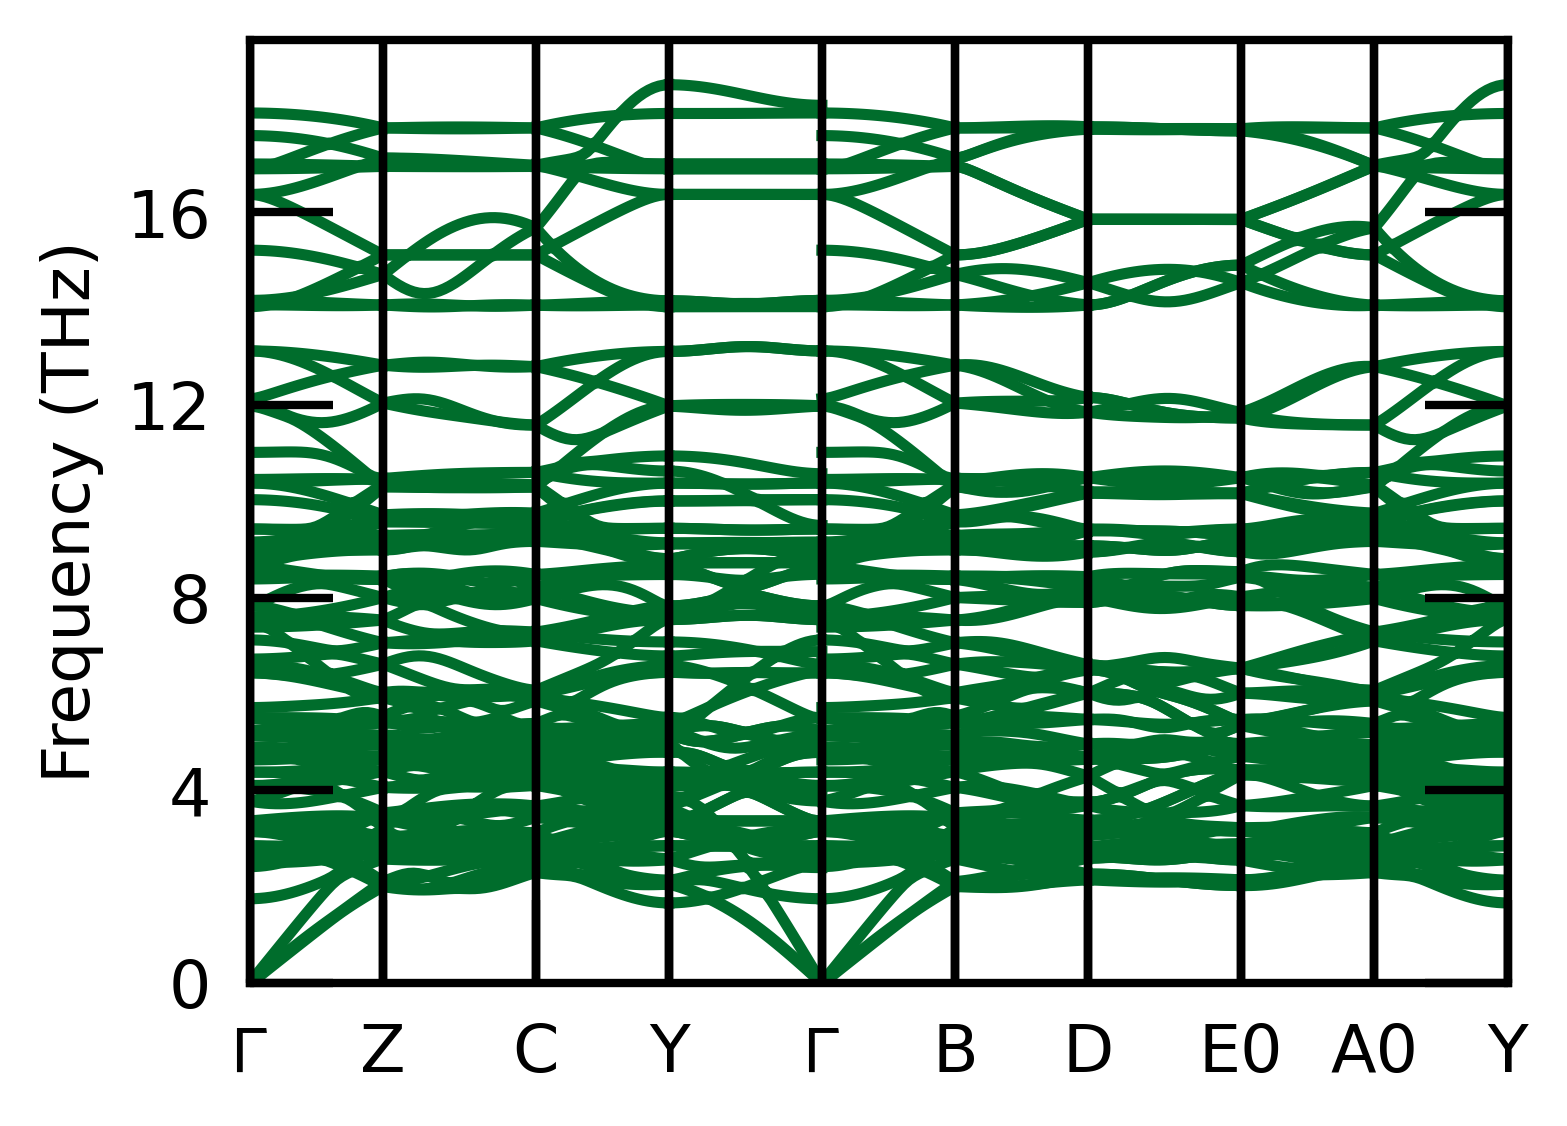

In [17]:
li2fe2s2o = load_node('523efb1e-1cd0-45d2-ae41-0151102d2959')
itf = phonopy_aiida.SumoPlotInterface.from_work_node(li2fe2s2o)
itf.get_phonon_band_structure()
pl = itf.plot_phonon_bs(width=4, height=3,style={'font.size': 12}, dpi=120)
pl.savefig('li2fe2s2o.svg')
ps = li2fe2s2o.inputs.structure.get_pymatgen()
spa = SpacegroupAnalyzer(ps)
conv = spa.get_conventional_standard_structure() * [[1, 0, -1], [0, 2, 0], [1, 0, 1]]
conv.translate_sites(list(range(conv.num_sites)), [0.25, 0, 0.25])
conv.to('poscar', 'li2fe2s2o-inp.vasp')

## Li2Fe2S2O with imagiary modesl

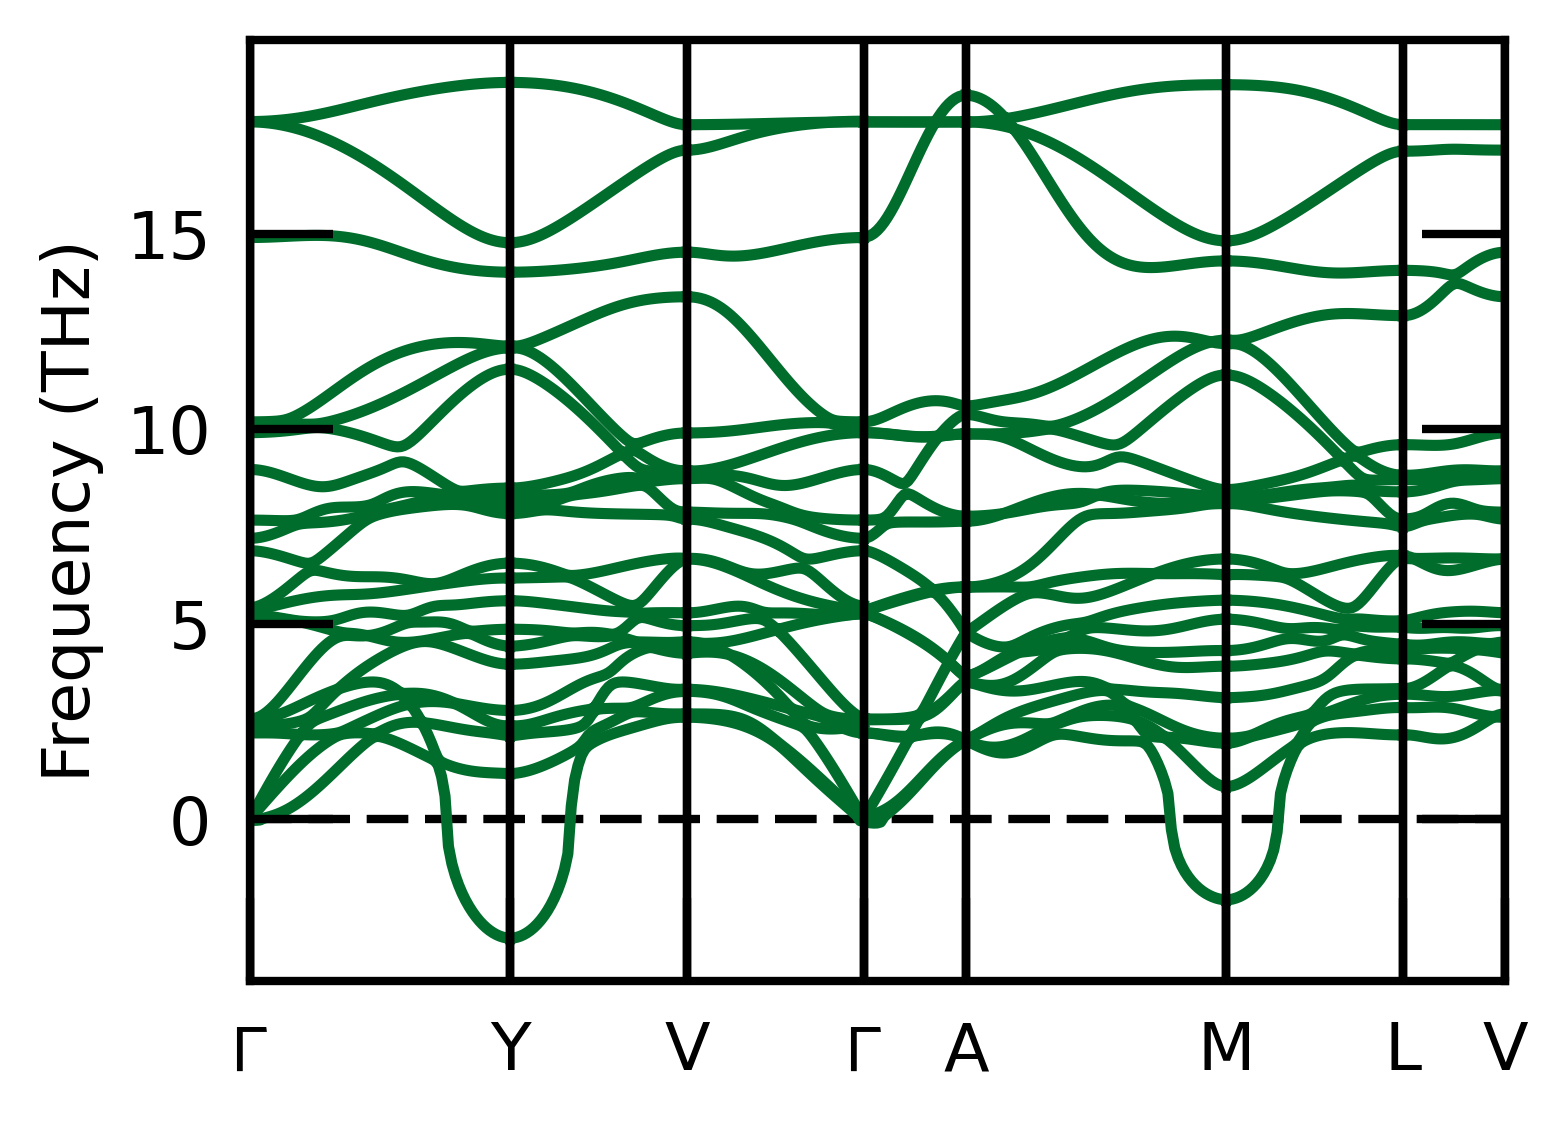

In [19]:
li2fe2s2o_imag = load_node('a4d226e0-158c-4913-91c8-ed22f0759a18')
itf = phonopy_aiida.SumoPlotInterface.from_work_node(li2fe2s2o_imag)
itf.get_phonon_band_structure()
pl = itf.plot_phonon_bs(width=4, height=3,style={'font.size': 12}, dpi=120)
pl.savefig("li2fe2s2o_imag.svg")
ps = li2fe2s2o_imag.inputs.structure.get_pymatgen()
spa = SpacegroupAnalyzer(ps)
conv = spa.get_conventional_standard_structure()
conv.to('poscar', 'li2fe2s2o-inp-imag.vasp')

## For Li2Fe3S2O2 mode pushed

In [20]:
VaspRelax = WorkflowFactory('vaspu.relax')

In [16]:
pk = li2fe3s2o2.inputs.structure.pk
q = QueryBuilder()
q.append(Node, filters={'id': pk})
q.append(VaspRelax, filters={'attributes.exit_status':0}, project=['label'])
q.append(Dict, project=['attributes.total_energies.energy_extrapolated'])
q.all()

[['Li2O2S2Fe3 RELAX', -50.17594092],
 ['LFSO-Li2Fe3S2O2-201022-171823-c39cef MODE PUSH RELAXED RELAXED q_003 RELAX U=4.0',
  -50.17593918],
 ['LFSO-Li2Fe3S2O2-201022-171823-c39cef MODE PUSH RELAXED RELAXED q_003 SUPER 3 2 2 HIGH-PREC RELAX',
  -50.1884132]]

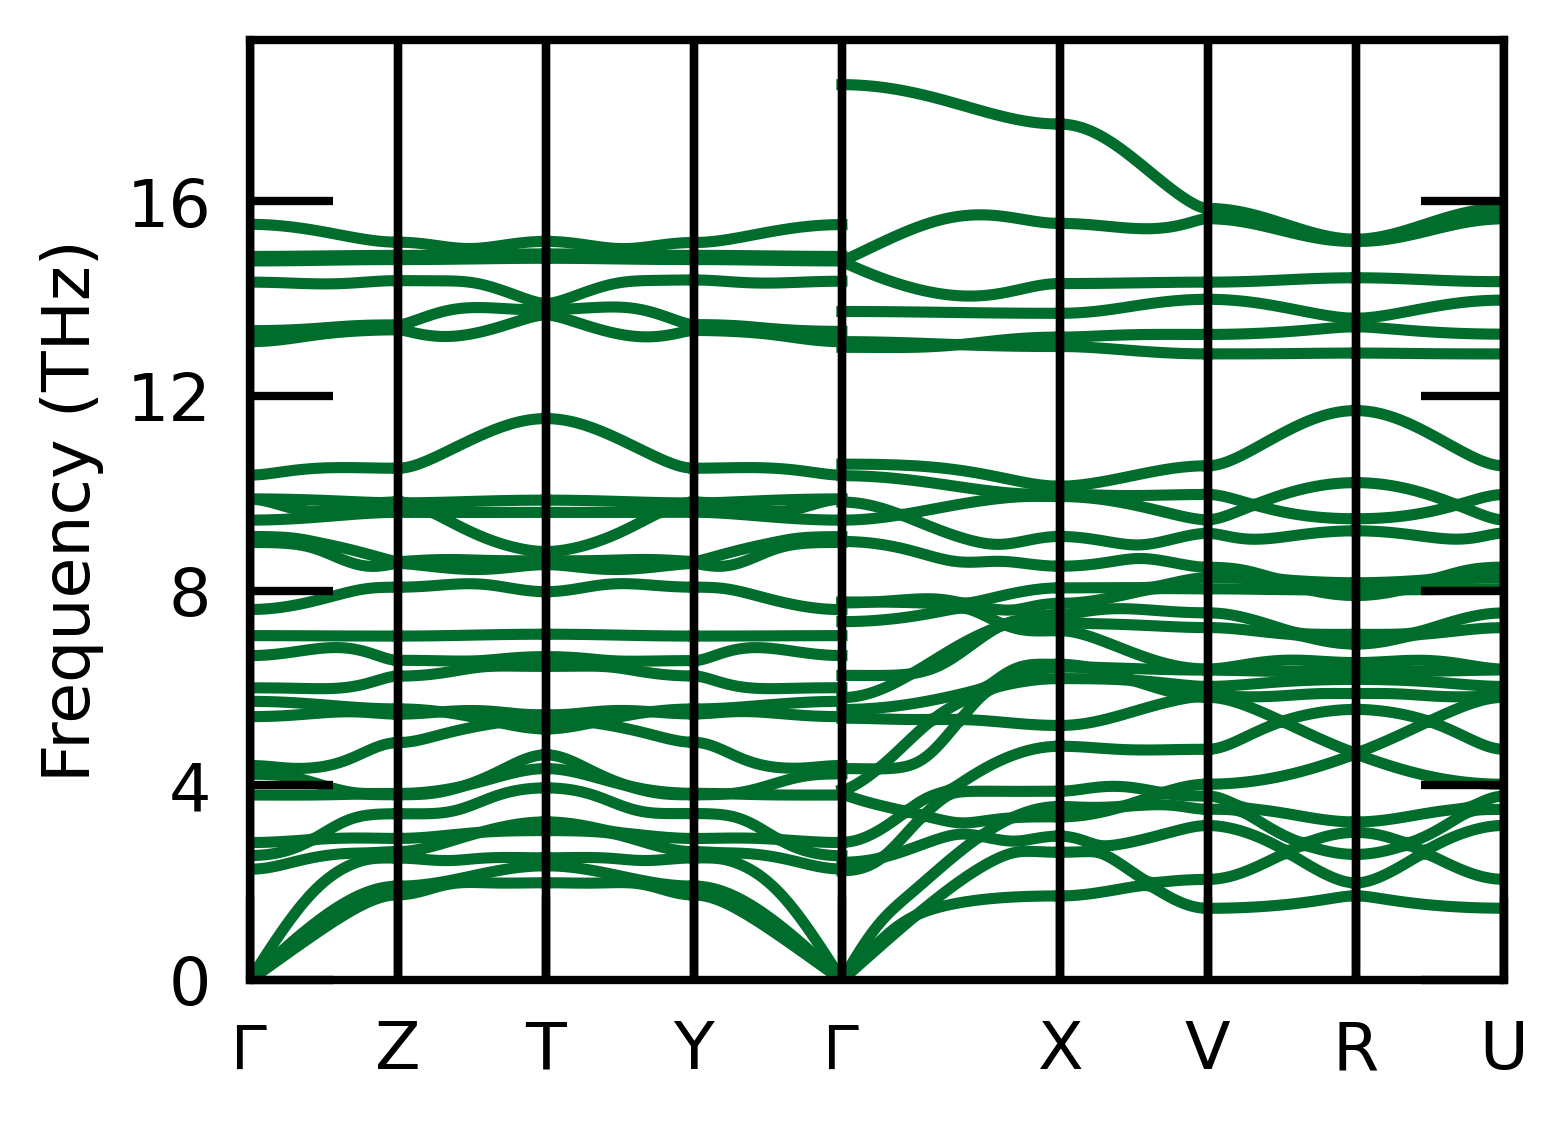

In [21]:
li2fe3s2o2 = load_node('dad71ad6-0dd8-45fb-99b6-3f39c3d69faa')
itf = phonopy_aiida.SumoPlotInterface.from_work_node(li2fe3s2o2)
itf.get_phonon_band_structure()
pl = itf.plot_phonon_bs(width=4, height=3,style={'font.size': 12}, dpi=120)
pl.savefig('li2fe3s2o2.svg')
ps = li2fe3s2o2.inputs.structure.get_pymatgen()
spa = SpacegroupAnalyzer(ps)
conv = spa.get_conventional_standard_structure()
conv.to('poscar', 'li2fe3s2o2-inp.vasp')

# For Li2Fe3S2O2 - with imaginary modes

/home/bonan/miniconda3/envs/aiida-1.0-py3/lib/python3.8/site-packages/seekpath/hpkot/__init__.py:316: EdgeCaseWarning: aP lattice, but the k_gamma3 angle is almost equal to 90 degrees
  warnings.warn(


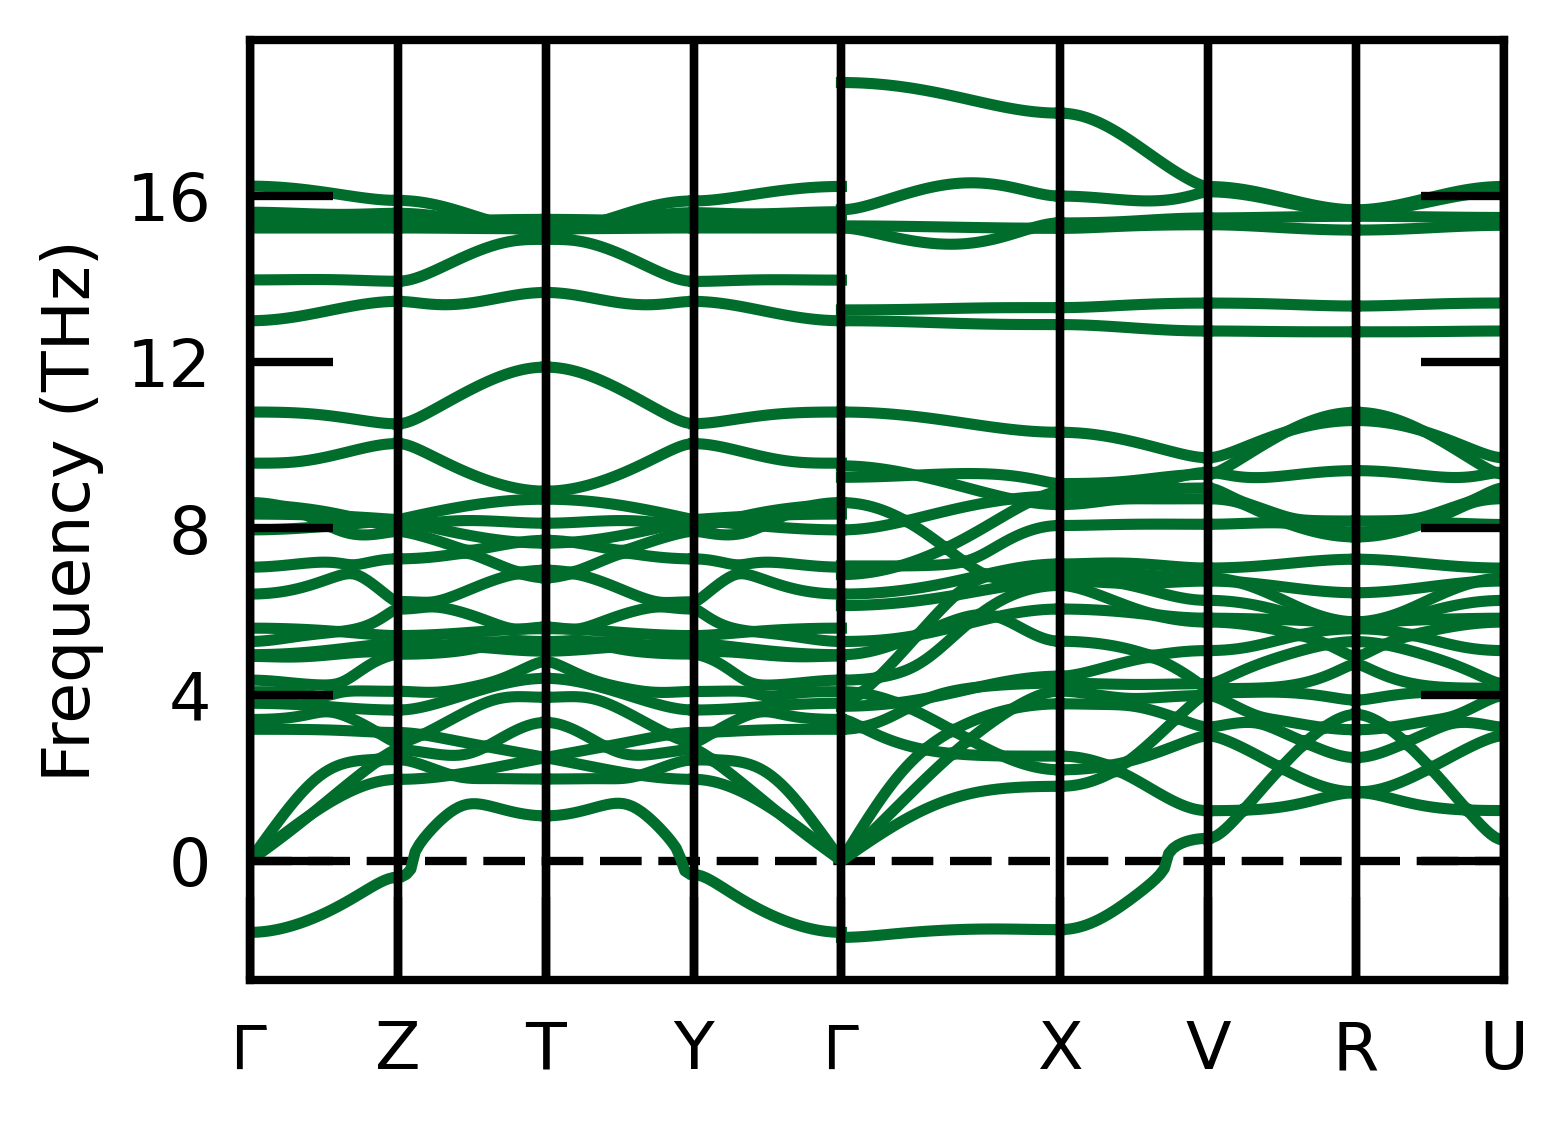

In [24]:
li2fe3s2o2_imag = load_node('20b83066-0485-4fa0-849c-8d20817f7aca')
itf = phonopy_aiida.SumoPlotInterface.from_work_node(li2fe3s2o2_imag)
itf.get_phonon_band_structure()
pl = itf.plot_phonon_bs(width=4, height=3,style={'font.size': 12}, dpi=120)
pl.savefig('li2fe3s2o2_imag.svg')
ps = li2fe3s2o2.inputs.structure.get_pymatgen()
spa = SpacegroupAnalyzer(ps)
conv = spa.get_conventional_standard_structure()
conv.to('poscar', 'li2fe3s2o2-inp-imag.vasp')

## The original Li2Fe3S2O2 structure

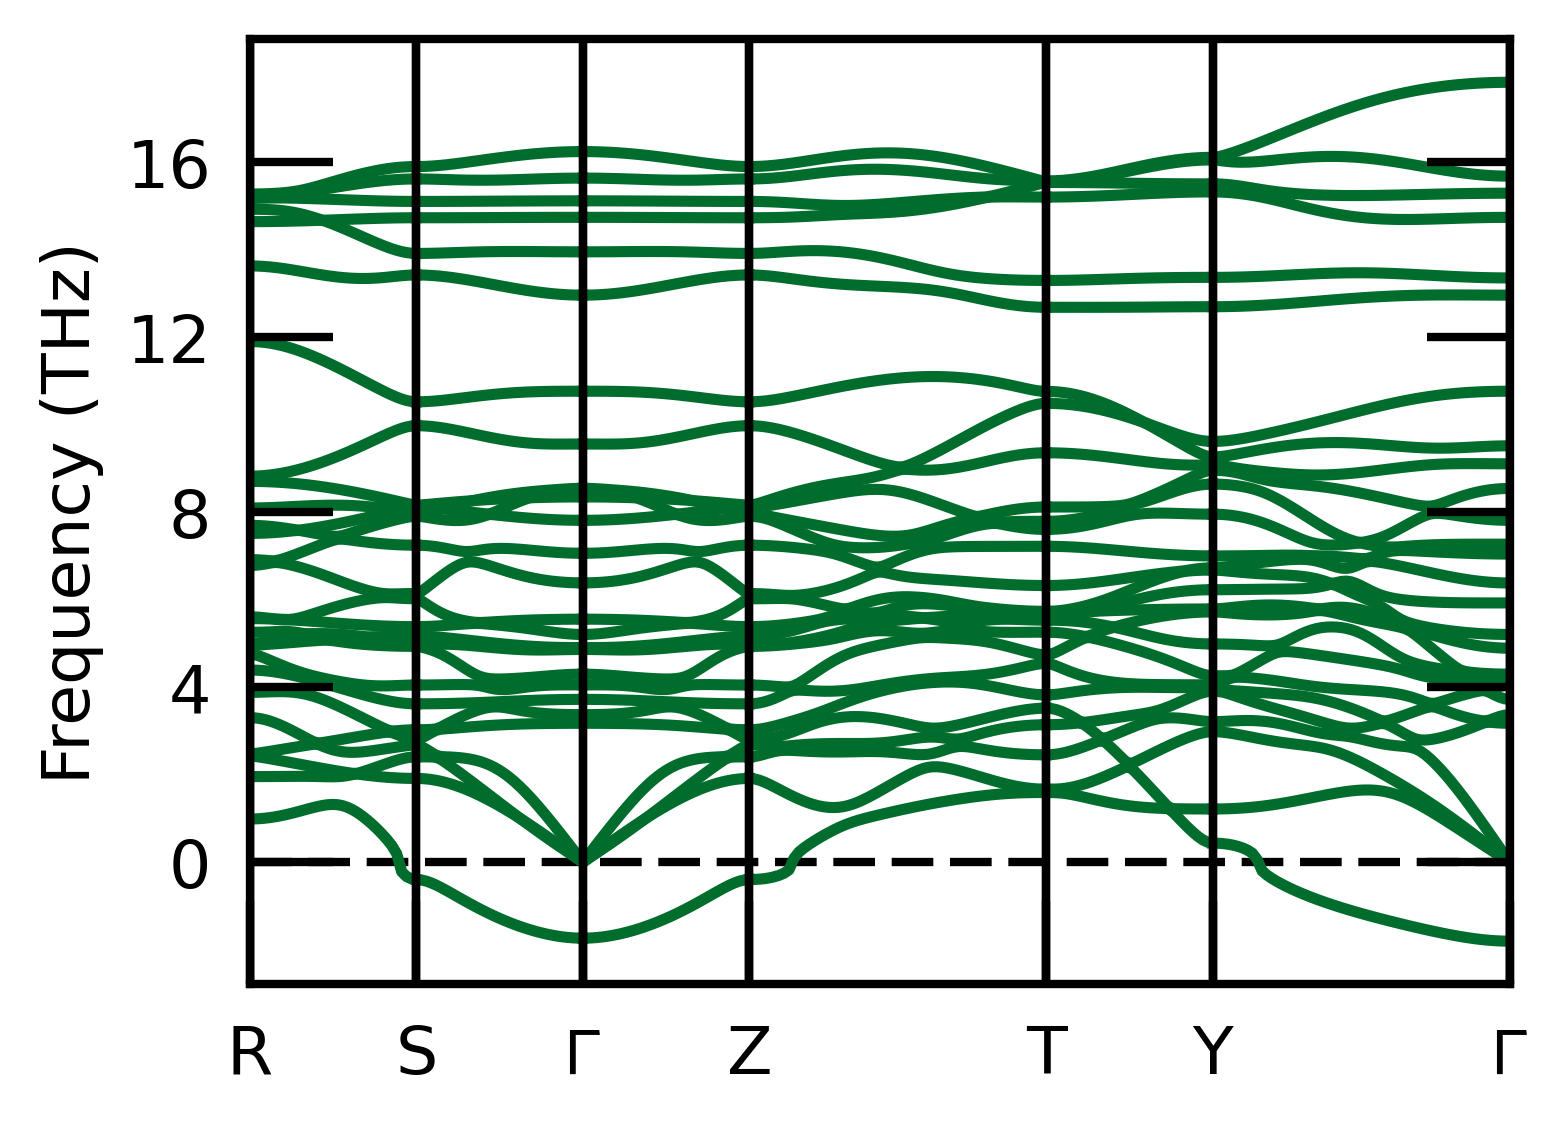

In [26]:
li2fe3s2o2_imag_orig = load_node('08c36372-91bc-4175-814b-20e950447f01')
itf = phonopy_aiida.SumoPlotInterface.from_work_node(li2fe3s2o2_imag_orig)
itf.get_phonon_band_structure()
pl = itf.plot_phonon_bs(width=4, height=3,style={'font.size': 12})
pl.savefig('li2fe3s2o2_imag-orig.svg')
ps = li2fe3s2o2_imag_orig.inputs.structure.get_pymatgen()
spa = SpacegroupAnalyzer(ps)
conv = spa.get_conventional_standard_structure()
conv.to('poscar', 'li2fe3s2o2-inp-imag-orig.vasp')

In [35]:
pk = li2fe3s2o2_imag.inputs.structure.pk
q = QueryBuilder()
q.append(Node, filters={'id': pk})
q.append(CalcJobNode, filters={'attributes.exit_status':0}, project=['label'])
q.append(Dict, project=['attributes.total_energies'])
q.all()

[['LFSO-Li2Fe3S2O2-201022-171823-c39cef RELAXED SUPER 3 2 2 HIGH-PREC RELAX ITER 01',
  {'energy_extrapolated': -50.1621917}],
 ['LFSO-Li2Fe3S2O2-201022-171823-c39cef RELAXED SUPER 3 2 2 HIGH-PREC RELAX ITER 01',
  {'energy_extrapolated': -50.1621917}],
 ['LFSO-Li2Fe3S2O2-201022-171823-c39cef RELAXED SUPER 3 2 2 HIGH-PREC RELAX ITER 01',
  {'energy_extrapolated': -50.1621917}],
 ['LFSO-Li2Fe3S2O2-201022-171823-c39cef RELAXED HSE06 ITER 01',
  {'energy_extrapolated': -75.48723464}],
 ['LFSO-Li2Fe3S2O2-201022-171823-c39cef RELAX U=4.0 SP',
  {'energy_no_entropy': -50.15227628}]]

Energy lowering after mode pushing:
- (-50.16245504 - -50.1884132) / len(li2fe3s2o2_imag.inputs.structure.sites) = 0.00288

Estimate energy change is about 3 meV per atom

## Li2FeSO

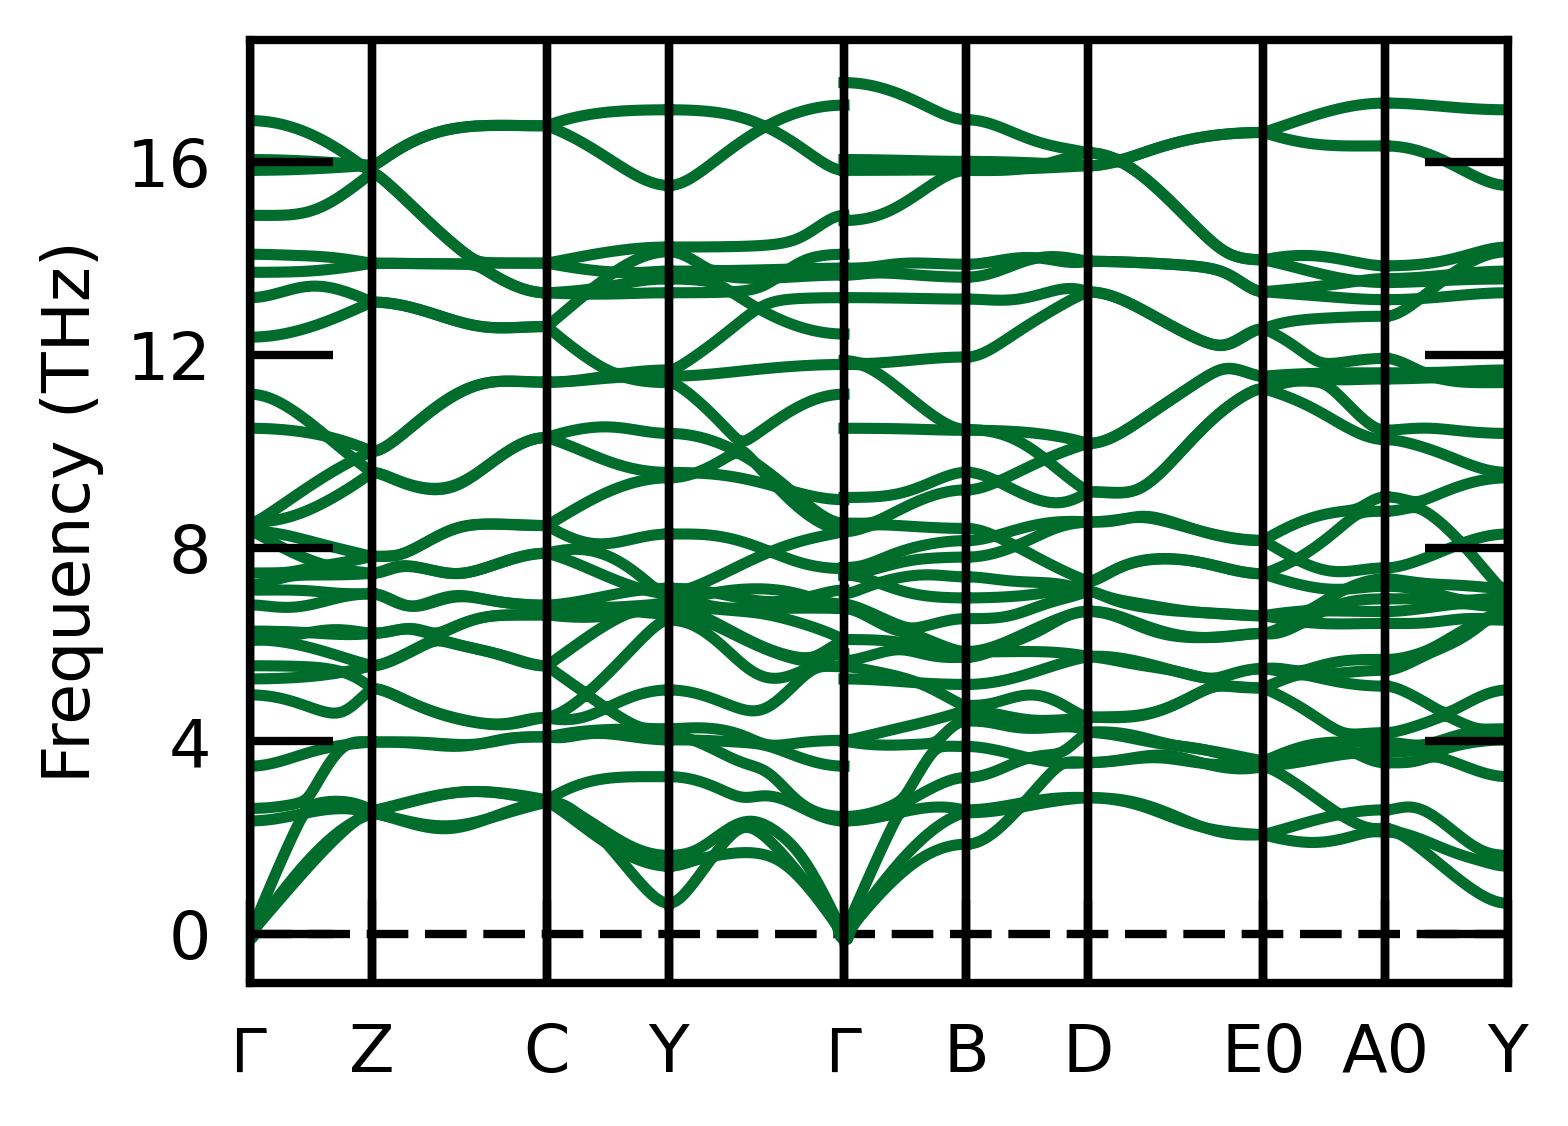

In [28]:
li2fe2so = load_node('1b3c0ad2-d25c-4632-bdd5-0803beb295c1')
itf = phonopy_aiida.SumoPlotInterface.from_work_node(li2fe2so)
itf.get_phonon_band_structure()
pl = itf.plot_phonon_bs(width=4, height=3,style={'font.size': 12})
pl.savefig('li2feso.svg')
ps = li2fe2so.inputs.structure.get_pymatgen()
spa = SpacegroupAnalyzer(ps)
conv = spa.get_conventional_standard_structure()
conv.to('poscar', 'li2feso.vasp')

## Ziheng phase

In [8]:
li2fe2so = load_node('e3aed4e2-977e-4bc8-885d-770449cd17eb')
itf = phonopy_aiida.SumoPlotInterface.from_work_node(li2fe2so)
itf.get_phonon_band_structure()
pl = itf.plot_phonon_bs(width=4, height=3,style={'font.size': 12})
pl.savefig('li2feso-ziheng-img.svg')
ps = li2fe2so.inputs.structure.get_pymatgen()
spa = SpacegroupAnalyzer(ps)
conv = spa.get_conventional_standard_structure()
conv.to('poscar', 'li2feso-ziheng-img.vasp')

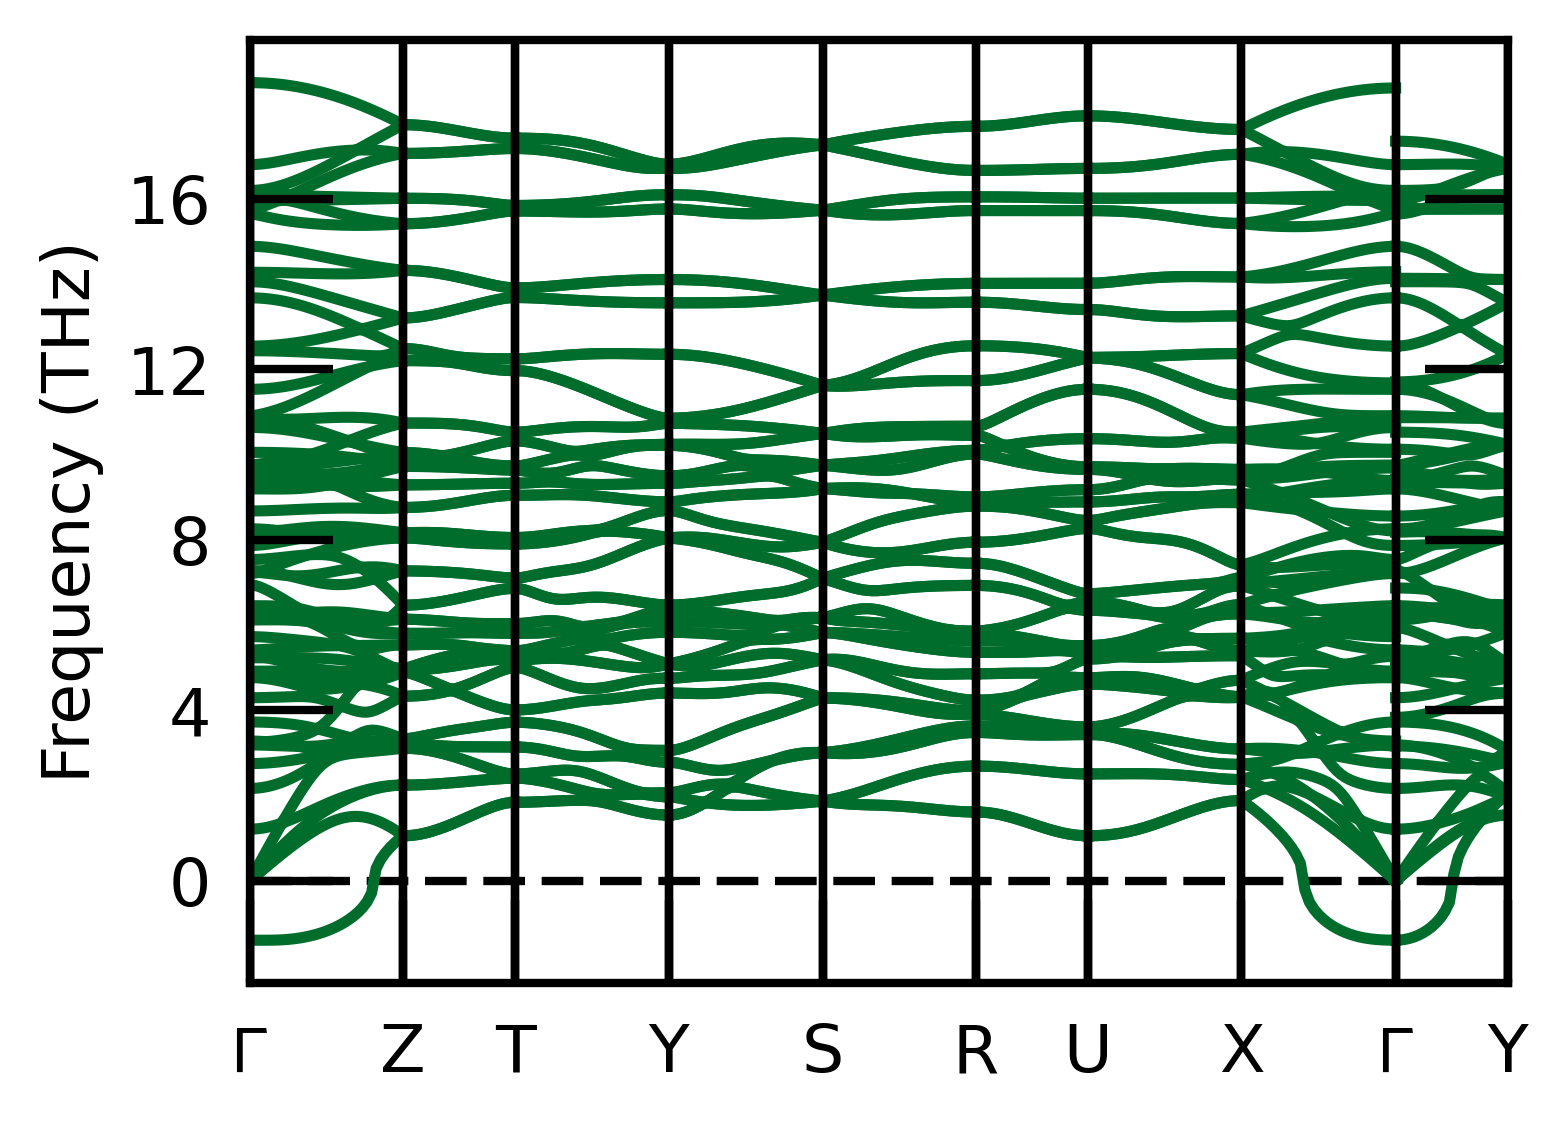

In [13]:
# This plot might have problems as symmetries are enforced
li2fe2so_ziheng_pushed = load_node('389ccdb7-f879-4f2b-ac30-ff46fb15be63')
itf = phonopy_aiida.SumoPlotInterface.from_work_node(li2fe2so_ziheng_pushed)
itf.get_phonon_band_structure()
pl = itf.plot_phonon_bs(width=4, height=3,style={'font.size': 12})
pl.savefig('li2feso-ziheng-pushed.svg')
ps = li2fe2so.inputs.structure.get_pymatgen()
spa = SpacegroupAnalyzer(ps)
conv = spa.get_conventional_standard_structure()
conv.to('poscar', 'li2feso-ziheng-pushed.vasp')

## For Li2Fe4S3O2

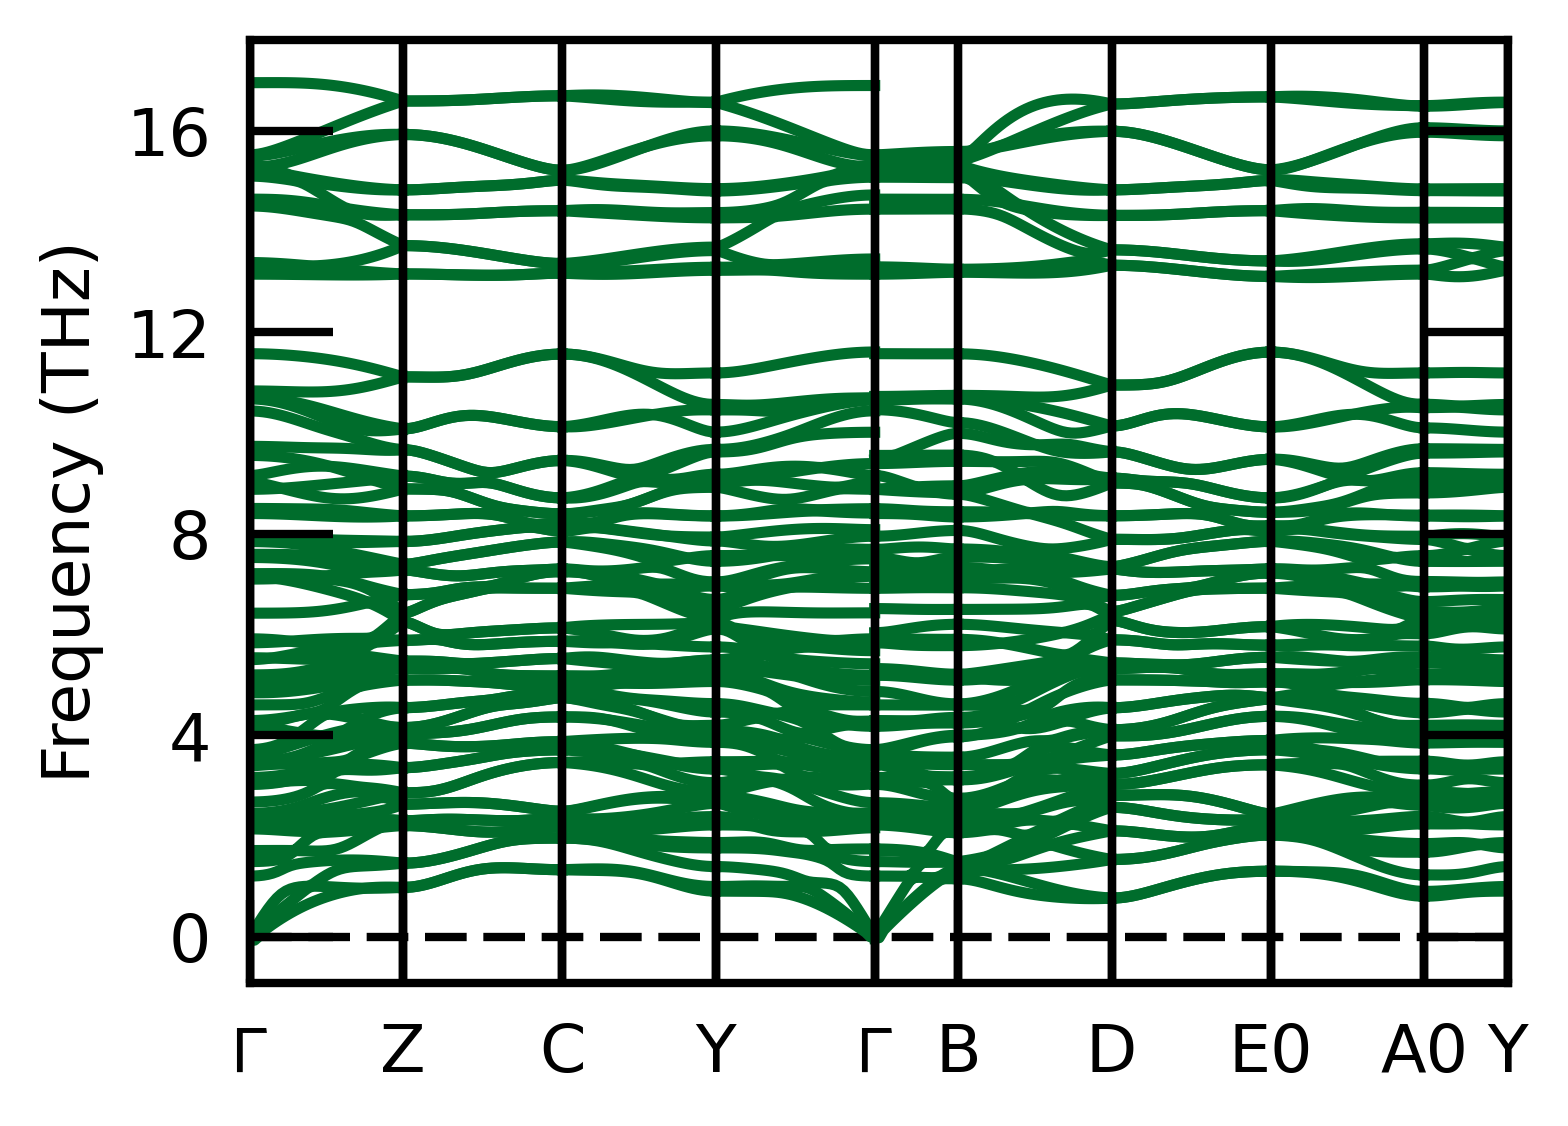

In [29]:
li2fe4s3o2 = load_node('f4f2e389-1896-43d2-9721-4a029e123ba0')
itf = phonopy_aiida.SumoPlotInterface.from_work_node(li2fe4s3o2)
itf.get_phonon_band_structure()
pl = itf.plot_phonon_bs(width=4, height=3,style={'font.size': 12})
pl.savefig('li2fe4s3o2.svg')
ps = li2fe4s3o2.inputs.structure.get_pymatgen()
spa = SpacegroupAnalyzer(ps)
conv = spa.get_conventional_standard_structure()
conv.to('poscar', 'li2fe4s3o2.vasp')

### With imaginary frequency

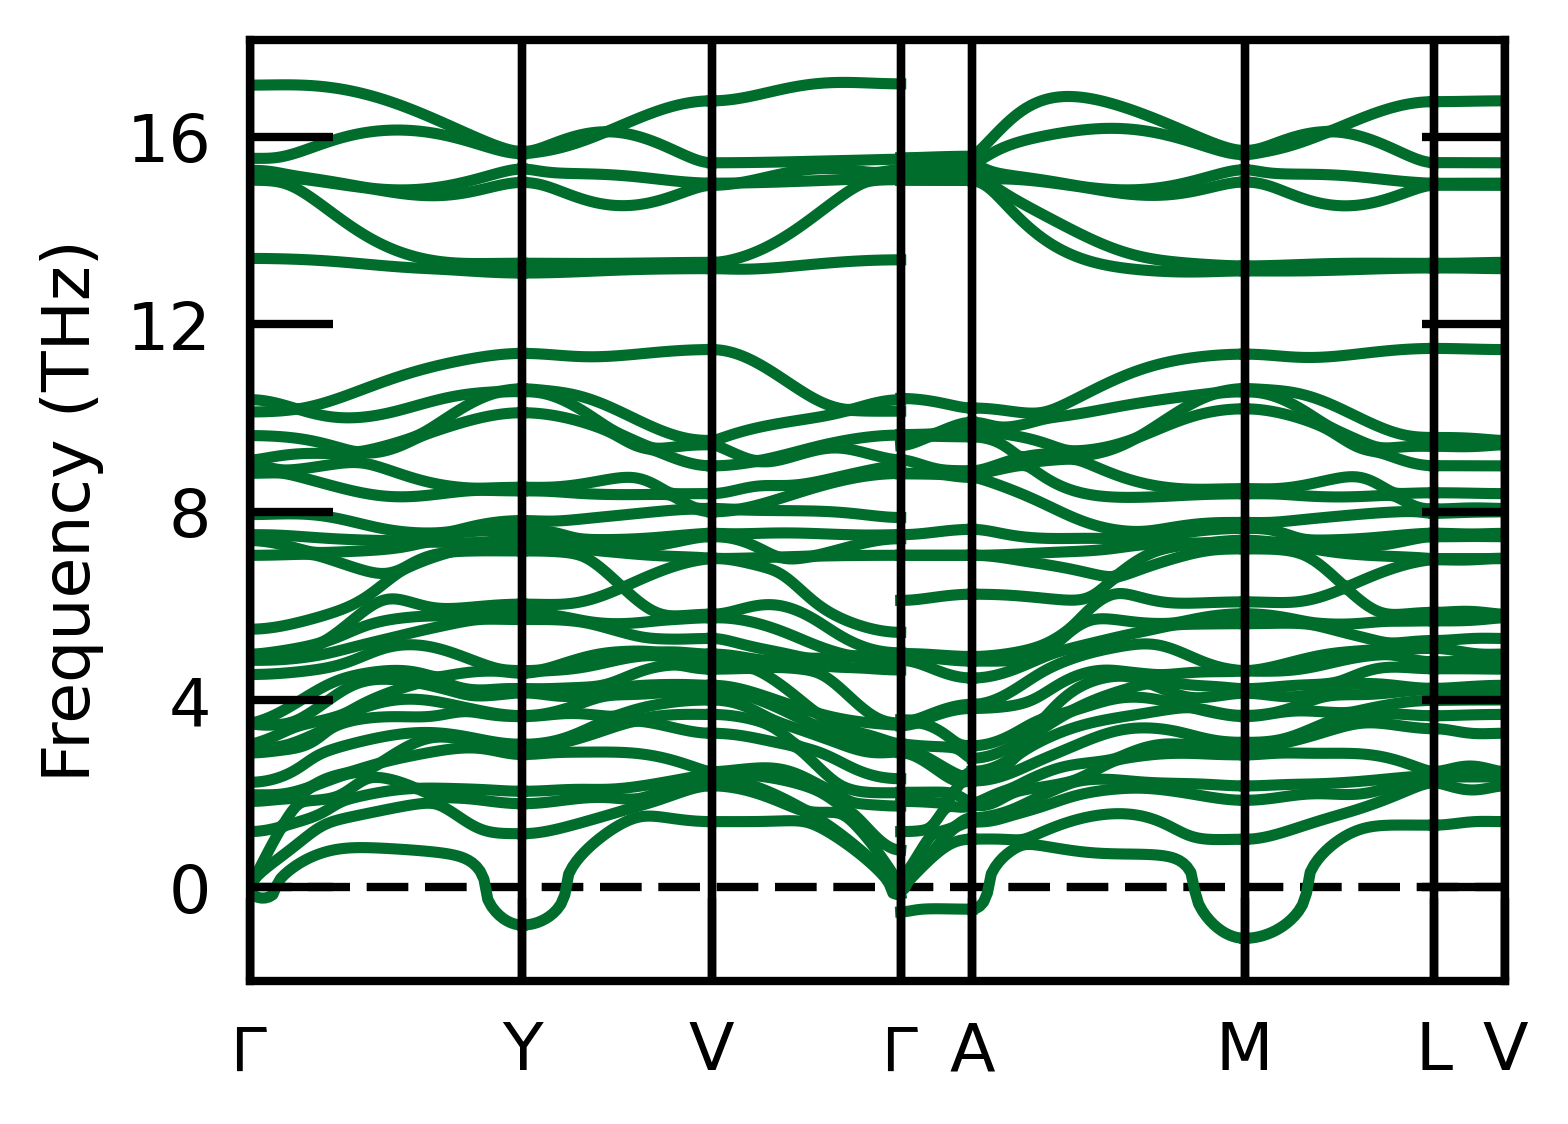

In [30]:
li2fe4s3o2_imag = load_node('82a864b7-a300-4192-9177-46aeeebd139a')
itf = phonopy_aiida.SumoPlotInterface.from_work_node(li2fe4s3o2_imag)
itf.get_phonon_band_structure()
pl = itf.plot_phonon_bs(width=4, height=3,style={'font.size': 12})
pl.savefig('li2fe4s3o2_imag.svg')
ps = li2fe4s3o2_imag.inputs.structure.get_pymatgen()
spa = SpacegroupAnalyzer(ps)
conv = spa.get_conventional_standard_structure()
conv.to('poscar', 'li2fe4s3o2_imag.vasp')